<a href="https://colab.research.google.com/github/malakkazi/Cognifyz_InternshipTasks/blob/main/L3_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong C

In [5]:
print("\nColumn names in dataset:")
print(df.columns)


Column names in dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [6]:
name_col   = "Restaurant Name"
votes_col  = "Votes"
rating_col = "Aggregate rating"

In [7]:
df[votes_col]  = pd.to_numeric(df[votes_col], errors="coerce")
df[rating_col] = pd.to_numeric(df[rating_col], errors="coerce")
df = df.dropna(subset=[votes_col, rating_col])

In [9]:
highest = df.loc[df[votes_col].idxmax(), [name_col, votes_col, rating_col]]
lowest  = df.loc[df[votes_col].idxmin(), [name_col, votes_col, rating_col]]
print("\nRestaurant with Highest Votes:")
print(highest)

print("\nRestaurant with Lowest Votes:")
print(lowest)


Restaurant with Highest Votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with Lowest Votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object


In [11]:
corr = df[votes_col].corr(df[rating_col])
print(f"\nCorrelation between Votes and Rating: {corr:.3f}")


Correlation between Votes and Rating: 0.314


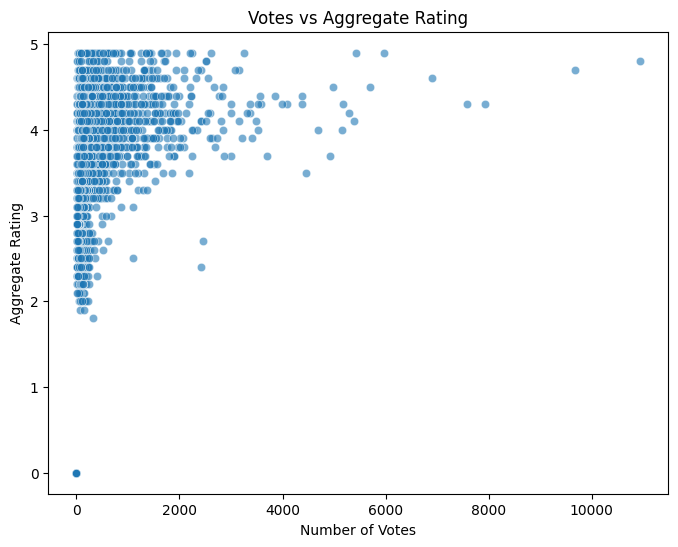

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=votes_col, y=rating_col, alpha=0.6)
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.show()

/tmp/ipython-input-1571173568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x=votes_col, y=name_col, palette="Blues_r")


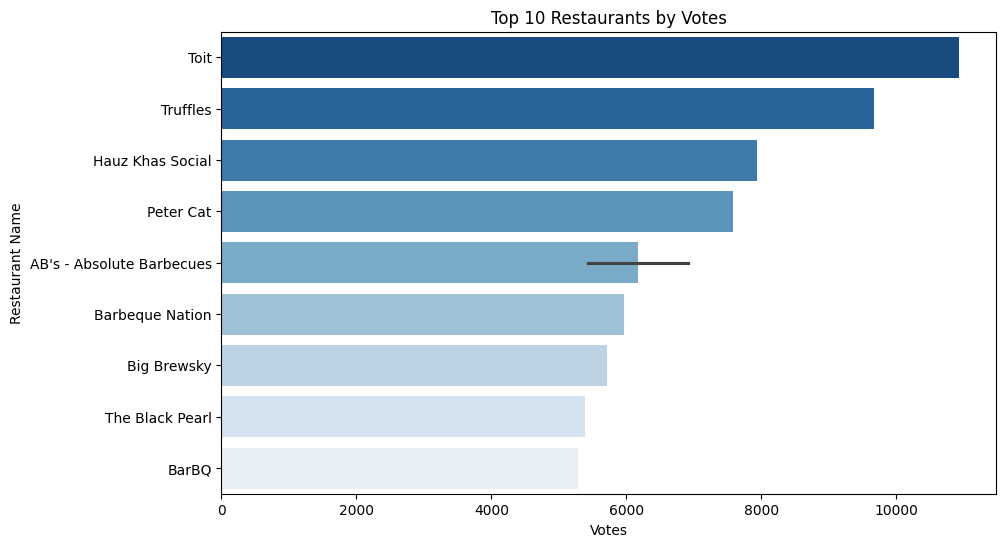

In [13]:
top10 = df.nlargest(10, votes_col)[[name_col, votes_col]]
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x=votes_col, y=name_col, palette="Blues_r")
plt.title("Top 10 Restaurants by Votes")
plt.xlabel("Votes")
plt.ylabel("Restaurant Name")
plt.show()